In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
49284,70372,15236,2,173,127.0,120,90,3,1,0,0,0,1
47349,67627,19089,1,165,62.0,120,80,1,1,0,0,1,1
42390,60556,14511,1,160,90.0,120,80,3,1,0,0,1,0
18048,25782,23093,2,166,69.0,110,70,3,1,0,0,1,1
41232,58924,15981,1,167,70.0,130,90,1,1,0,0,1,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
def is_overweight(weight, height):
    bmi = weight /((height/100)**2)
    if bmi < 25.0:
        return 0
    return 1

df['overweight'] = df.apply(lambda x: is_overweight(x['weight'], x['height']), axis=1)
df['overweight'].value_counts()

1    43560
0    26440
Name: overweight, dtype: int64

In [5]:
def normalize1(value):
    if value > 1:
        return 1
    return 0

df['cholesterol'] = df.apply(lambda x: normalize1(x['cholesterol']), axis=1)
df['gluc'] = df.apply(lambda x: normalize1(x['gluc']), axis=1)

df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

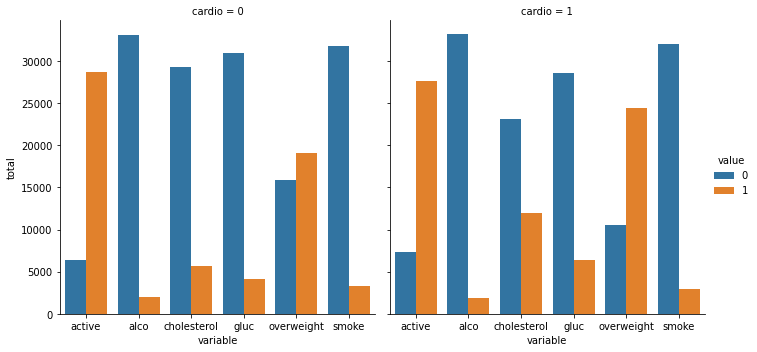

In [6]:
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat_melted = pd.melt(df, id_vars='cardio', value_vars=columns)
df_cat_melted['total'] = 1
df_cat_melted = df_cat_melted.groupby(['cardio', 'variable', 'value'], as_index=False).count()

g = sns.catplot(x='variable', y='total', hue='value', data=df_cat_melted, col='cardio', kind='bar')

In [8]:
filter1 = df['ap_lo'] <= df['ap_hi']
filter2 = df['height'] >= df['height'].quantile(0.025)
filter3 = df['height'] <= df['height'].quantile(0.975)
filter4 = df['weight'] >= df['weight'].quantile(0.025)
filter5 = df['weight'] <= df['weight'].quantile(0.975)

df = df[filter1 & filter2 & filter3 & filter4 & filter5]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000,63259.000000
mean,49891.225770,19467.169004,1.346828,164.490112,73.525384,128.851152,81.208239,0.245657,0.147125,0.086296,0.052593,0.803411,0.493621,0.621603
std,28834.472519,2462.691222,0.476263,6.864083,11.914258,161.596380,9.520961,0.430479,0.354234,0.280803,0.223222,0.397422,0.499963,0.484991
min,0.000000,10798.000000,1.000000,150.000000,51.000000,12.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24909.500000,17671.000000,1.000000,160.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,49887.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74727.500000,21321.000000,2.000000,169.000000,81.000000,140.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,180.000000,108.000000,16020.000000,182.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


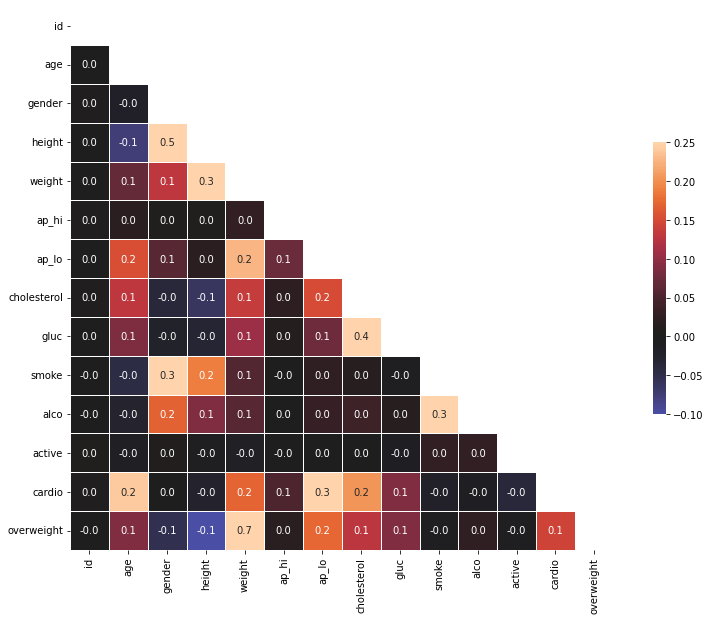

In [107]:
# Clean the data
df_heat = df

# Calculate the correlation matrix
corr = df_heat.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

fig, ax = plt.subplots(figsize=(14,10))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", linewidths=1, center=0.0, vmax=0.25, vmin=-0.1, square=True, cbar_kws={"shrink":0.5})